## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data from Excel Sheet

In [8]:
file_name =  "Dataset.xls"
sheet =  'Heart Disease 1'

df = pd.read_excel(io=file_name, sheet_name=sheet)
df=df.head(100) #Select first 100 rows

# Data Processing

## Select the given attributes

In [9]:
#BMI, Smoking, PhysicalHealth, Race, Age
df = df[['BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory']]

df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory
0,16.60,Yes,3,White,55-59
1,20.34,No,0,White,80 or older
2,26.58,Yes,20,White,65-69
3,24.21,No,0,White,75-79
4,23.71,No,28,White,40-44
...,...,...,...,...,...
95,19.49,No,0,White,45-49
96,24.02,No,0,White,70-74
97,28.35,Yes,20,White,65-69
98,24.37,No,0,White,55-59


## Check if there is any column with "nan" values

In [10]:
df.isnull().any()

BMI               False
Smoking           False
PhysicalHealth    False
Race              False
AgeCategory       False
dtype: bool

## Change the intervals to midpoint values

In [11]:
for i in df['AgeCategory']:
    if i == '18-24':
        df['AgeCategory'] = df['AgeCategory'].replace(['18-24'], 21)
    elif i == '25-29':
        df['AgeCategory'] = df['AgeCategory'].replace(['25-29'], 27)
    elif i == '30-34':
        df['AgeCategory'] = df['AgeCategory'].replace(['30-34'], 32)
    elif i == '35-39':
        df['AgeCategory'] = df['AgeCategory'].replace(['35-39'], 37)
    elif i == '40-44':
        df['AgeCategory'] = df['AgeCategory'].replace(['40-44'], 42)
    elif i == '45-49':
        df['AgeCategory'] = df['AgeCategory'].replace(['45-49'], 47)
    elif i == '50-54':
        df['AgeCategory'] = df['AgeCategory'].replace(['50-54'], 52)
    elif i == '55-59':
        df['AgeCategory'] = df['AgeCategory'].replace(['55-59'], 57)
    elif i == '60-64':
        df['AgeCategory'] = df['AgeCategory'].replace(['60-64'], 62)
    elif i == '65-69':
        df['AgeCategory'] = df['AgeCategory'].replace(['65-69'], 67)
    elif i == '70-74':
        df['AgeCategory'] = df['AgeCategory'].replace(['70-74'], 72)
    elif i == '75-79':
        df['AgeCategory'] = df['AgeCategory'].replace(['75-79'], 77)
    elif i == '80 or older':
        df['AgeCategory'] = df['AgeCategory'].replace(['80 or older'], 85)


df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory
0,16.60,Yes,3,White,57
1,20.34,No,0,White,85
2,26.58,Yes,20,White,67
3,24.21,No,0,White,77
4,23.71,No,28,White,42
...,...,...,...,...,...
95,19.49,No,0,White,47
96,24.02,No,0,White,72
97,28.35,Yes,20,White,67
98,24.37,No,0,White,57


## Change string to Int/Float

In [12]:
for i in df['Smoking']:
    if i == 'Yes':
        df['Smoking'] = df['Smoking'].replace(['Yes'], int(1))
    elif i == 'No':
        df['Smoking'] = df['Smoking'].replace(['No'], int(0))
for i in df['Race']:
    if i == 'American Indian/Alaskan Native':
        df['Race'] = df['Race'].replace(['American Indian/Alaskan Native'], int(0))
    elif i == 'Asian':
        df['Race'] = df['Race'].replace(['Asian'], int(1))
    elif i == 'Black':
        df['Race'] = df['Race'].replace(['Black'], int(2))
    elif i == 'Hispanic':
        df['Race'] = df['Race'].replace(['Hispanic'], int(3))
    elif i == 'White':
        df['Race'] = df['Race'].replace(['White'], int(4))
    elif i == 'Other':
        df['Race'] = df['Race'].replace(['Other'], int(5))

## Exploratory Data Analysis

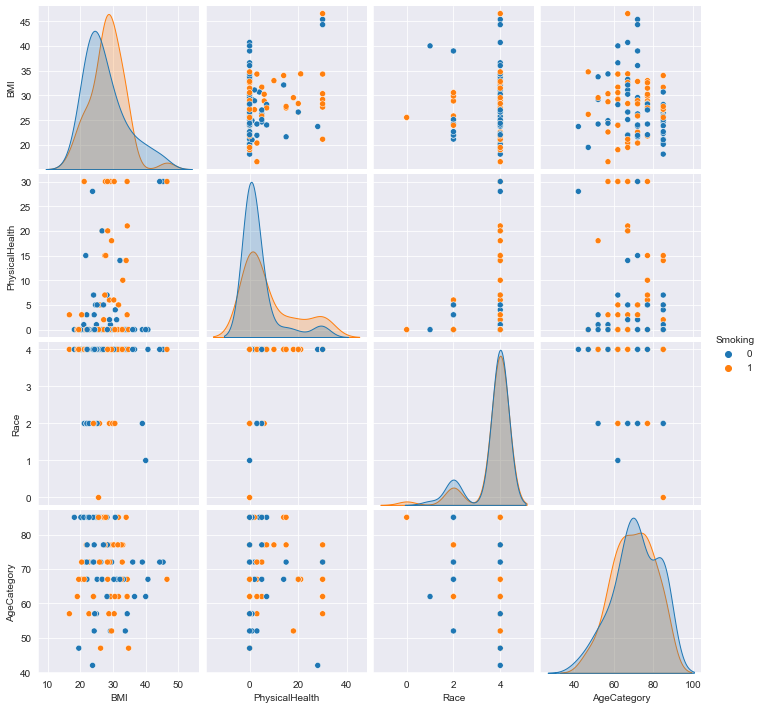

In [13]:
sns.pairplot(data=df, hue = 'Smoking')

# Model Fitting & Test
## Split Input and Target Columns and Split Train-Test Data

In [7]:
target = df['Smoking']
inputs = df.drop(['Smoking'], axis=1)

x = inputs.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

## Decision Tree Classifier

In [8]:
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=3, min_samples_leaf=5)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Plot Tree

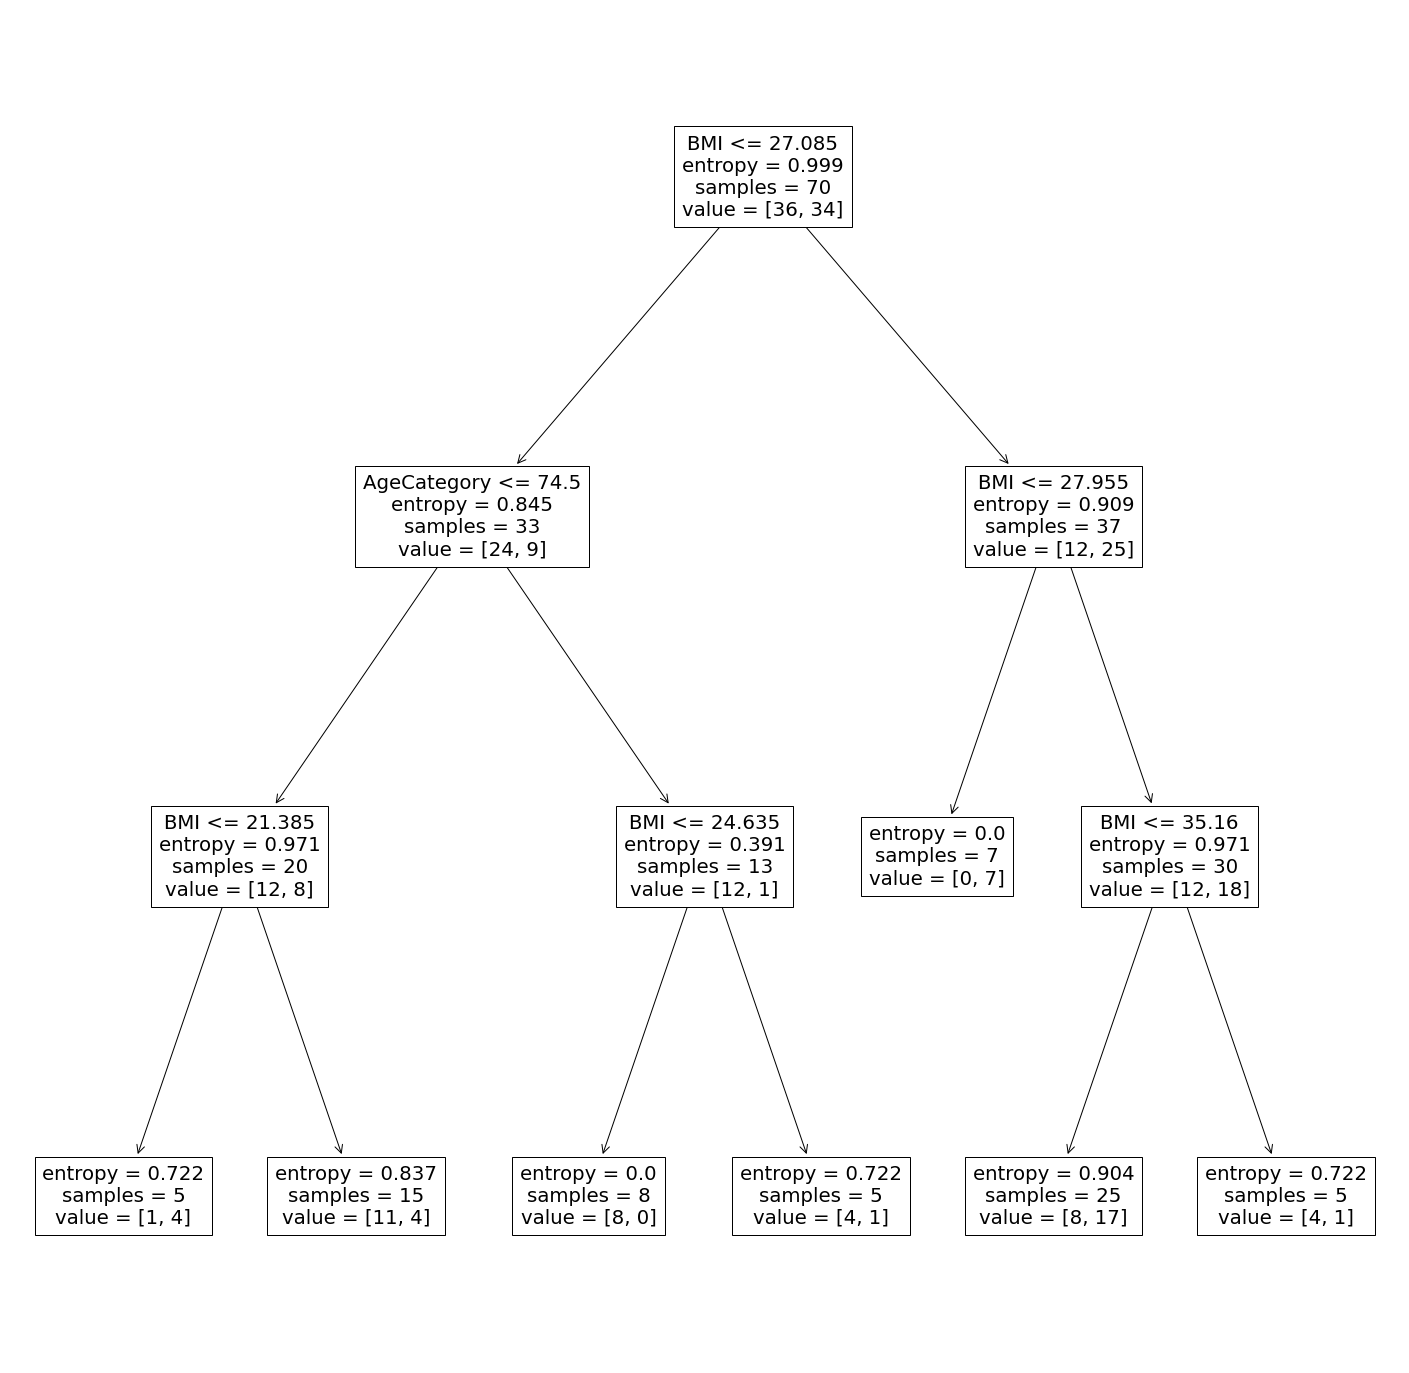

In [13]:
fig, ax = plt.subplots(figsize=(25,25))
tree.plot_tree(clf_tree, ax=ax, feature_names=['BMI', 'PhysicalHealth', 'Race', 'AgeCategory'])
plt.show()

## Show Predicted Values

In [14]:
y_pred = clf_tree.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0]


## Show Results

In [15]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[10  5]
 [ 5 10]]
Accuracy :  66.66666666666666
Report :                precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30



## Confusion Matrix - Using Seaborn

Text(0.5, 1.0, 'Accuracy Score: 66.67')

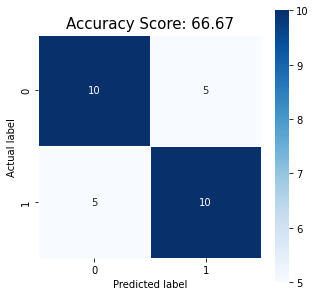

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)